# CONSTRUCTION D'UN MODELE DE MACHINE LEARNING POUR PREDIRE LE DESABONNEMENT DES CLIENTS D'UNE ENTREPRISE

Le désabonnement d'un client se produit lorsque ce dernier decide d'utiliser les services, le contenu ou les produits d'ue entreprise. Il existe de nombreux exemples et cas de désabonnement:


*  Annulation d'un service sous contrat ou non;
*   achat dans un autre magasin concurrent ;
*  Désabonnement d'une newletter;
* Clôture de compte bancaire;
* Etc.
Dans ce monde des saffairees où une entreprise fait face à de nombreux concurrents, le coût d'acquisition de nouveaux clients est très élevé. Dès lors, la fidelisation des clients existants est plus importante pour les entreprises. Ainsi, l'entreprise doit mieux comprendre le comportement de ses clients afin de les fideliser. Une façon de le faire cosiste à créer un modèle de Machine Learning ou de réseaux de neurones artificielles qui peut predire quels clients sont susceptibles de se desabonner. L'entreprise peut mieux cibler et fideliser ses clients specifiques qui presentent un risque plus élevé de désabonnement.
Dans ce projet, nous explorerons un ensemble de données d'une entreprise de télécommunications et créerons un modèle  dans le but de prédire les clients présentant un risque de désabonnement plus élevé. Nous utiliserons differents algorithmes de machine learning afin de comparer leur performance puis nous choisisserons le meilleur modèle.

J'ai refait ce projet en regardant les vidéos de la chaine Youtube J.A Datatech Consulting
https://www.youtube.com/watch?v=D1IiOxs-Urc&list=PLmJWMf9F8euQOdkzeAyICws1aYJXTD4dI&index=1




# Importation des outils nécessaires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

# Importation des données

Nous pouvons voir la descriptions des variables sur Kaggle via le lien : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

La variable cible est "churn" qui prend 2 valeurs: "Yes" (le client s'est désabonné) ou "No"(le client ne s'est pas désabonné)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JosueAfouda/TUTORIALS/main/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# informations sur l'ensemble des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Apparemment, il n'y a pas de valeurs manquantes mais elles peuvent être cachées. L'analyse exploratoire nous donnera beaucoup plus de détails sur les donnera

In [4]:
df.shape

(7043, 21)

Nous avons 7043 lignes et 21 colonnes

In [5]:
df.nunique()       # pour afficher le nombre de valeurs uniques par colonne

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Le nombre de lignes est égale au nombre de valeurs distinctes de "CustomerID" qui est 7043, ce qui prouve.
On en deduit que chaque ligne de l'ensemble de données représentent un client unique.

Effectuons une analyse exploratoire des données afin de mieux les comprendre.

#Analyse exploratoire des données

Pour ce faire, commençons par tracer un graphique de visualisation de la distribution de chaque variable.

In [6]:
# Variables categorielles

categorical_columns = df.nunique()[df.nunique() < 5].keys().to_list()
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [7]:
# Création d'une fonction de construction de graphiques à barres et de manière interactive

def bar_plot(a):
  df[a].value_counts(normalize = True).plot(kind = 'bar')
  plt.ylabel('Proportion')
  plt.title('Distribution of '+ str(a))
  return plt.show()

In [8]:
# Interact

interact(bar_plot, a = categorical_columns)

interactive(children=(Dropdown(description='a', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

<function __main__.bar_plot(a)>

Ce graphique interactif nous permet d'obtenir les informations suivantes:


*  Il y a plus de clients qui ne sont pas désabonnés (plus de 70%) que de clients qui se sont désabonnés (moins de 30 %) . Donc nous avons un problèmede déséquilibre qu'il faudra resoudre car il peut impacter la performance des classification des modèles que nous allons construire
* La distribution des données entre les différents sexes est à peu prés également repartie.
* Le nombre de clients qui sont des personnes âgées (moins de 20 %) est bien inférieur à celui des plus jeunes (80%)
* Les 2 catégories (Yes or No) du variable partener indiquent la même proportion.

Répétons le même processus cette fois-ci pour les variables numeriques

In [9]:
# Echantionnement aleatoire de la variable "TotalCharges"

df['TotalCharges'].sample(10)

6121     159.35
6703       85.5
6696      500.1
1010     160.85
3845     280.85
2509     1841.2
7034    6886.25
6964     2780.6
1941      189.1
2642    4045.65
Name: TotalCharges, dtype: object

Apparemment c'est à cause de la presence d'espace au niveau de la variable **TotalCharges** pendant que Pandas la considere comme une variable avec des valeurs de type object(chaine de caractere).

Donc nous allons remplacer ces espaces par des NaN(Not a number) et transformer letype de ces valeurs en float(decimal)

In [10]:
# Variables quantitatives

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Creation d'une fonction de construction d'histogrammes et de maniere insteractive

def hist_plot(b):
  sns.displot(df[b], kde=False)
  plt.title('Histogram of '+str(b))
  return plt.show()

# Conversion du type des valeurs de la variabble 'TotalCharges' en float(decimal)

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [11]:

# interact

interact(hist_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

On peut constater sur le graphe que la variable TotalCharges est tres asymetrique

In [12]:
# Coefficient d'asymetrie de la variable 'TotalCharges'

df['TotalCharges'].skew()

0.961642499724251

In [13]:
# Creation d'une fonction de construction de boites a moustaches et de maniere interactive


def box_plot(b):
  sns.boxplot(y = df[b])
  plt.title('Boxplot of '+str(b))
  return plt.show()

# Interact

interact(box_plot, b=numerical_columns)


interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

<function __main__.box_plot(b)>

Ces variables ne presentent pas de valeurs aberrantes(outliers), cependant elles sont tres asymetriques ce qui peut causer des erreurs au niveau des modeles que nous allons construire.

Nous appliquerons des fonctions de transformation a ces variables afin de les rendre moins asymetrique
Nous avons une comprehension de la distribution de chaque variable dans notre jeu de la distribution de chaque variable dans notre jeu de donnees.

Maintenant, procédons à des analyses bivariées

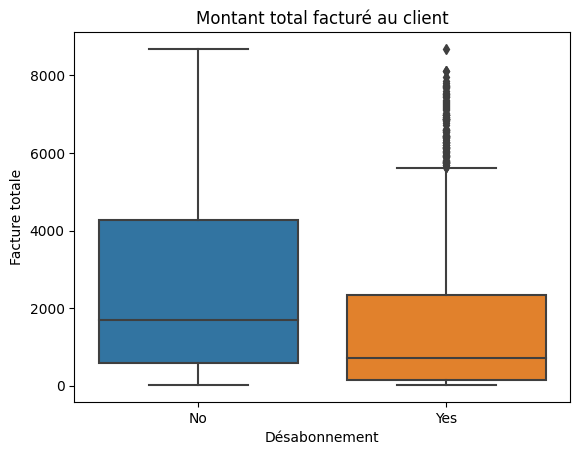

In [14]:
# Total Charges VS Churn

sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.xlabel('Désabonnement')
plt.ylabel('Facture totale')
plt.title('Montant total facturé au client')
plt.show()

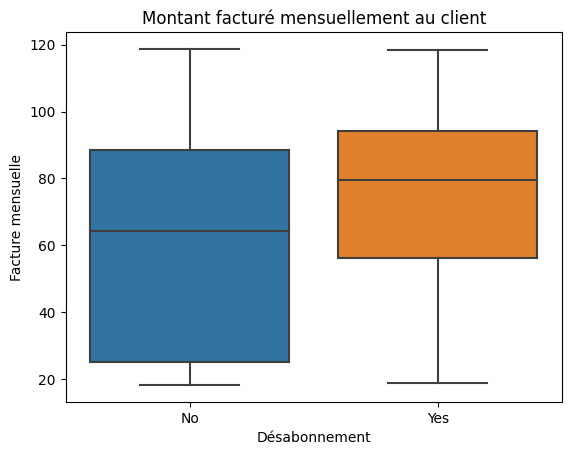

In [15]:
# Monthlcharges VS Churn

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Désabonnement')
plt.ylabel('Facture mensuelle')
plt.title('Montant facturé mensuellement au client')
plt.show()

Ce graphe montre que le montant total facturé aux clients qui ont résilié leur contrat est inferieur celui des clients ne l'ayant pas fait.Mais les clients qui se sont desabonnés sont facturés mensuellement que les clients qui se sont desabonnés.
Cette information est importante pour l'entreprise car le montant mensuel facturé peut-etre un facteur important qui determine si un client va se desabonner ou non.

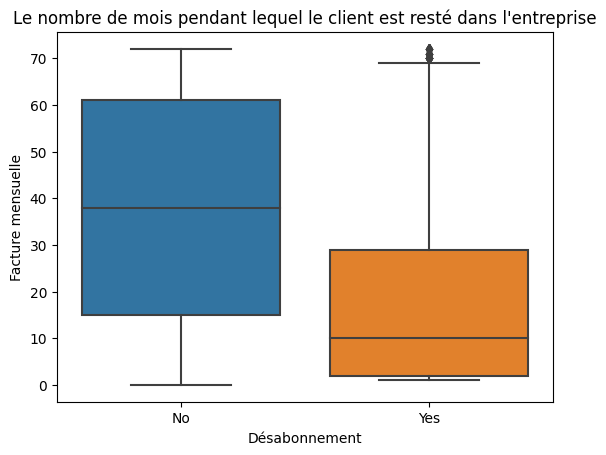

In [16]:
# Tenure VS Churn

sns.boxplot(x='Churn', y='tenure', data=df)
plt.xlabel('Désabonnement')
plt.ylabel('Facture mensuelle')
plt.title("Le nombre de mois pendant lequel le client est resté dans l'entreprise")
plt.show()

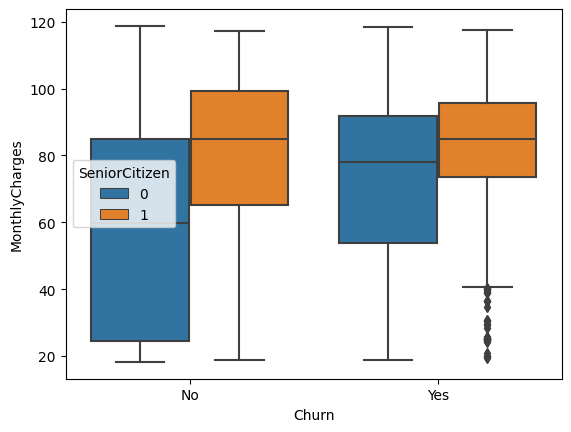

In [17]:
# Monthlcharges VS Churn by SeniorCitizen

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue = 'SeniorCitizen');


Il semble que les personnes âgées soient beaucoup plus facturées mensuellement que les jeunes. Malgré cela, il reste plus fidele a l'entreprise que les jeunes.

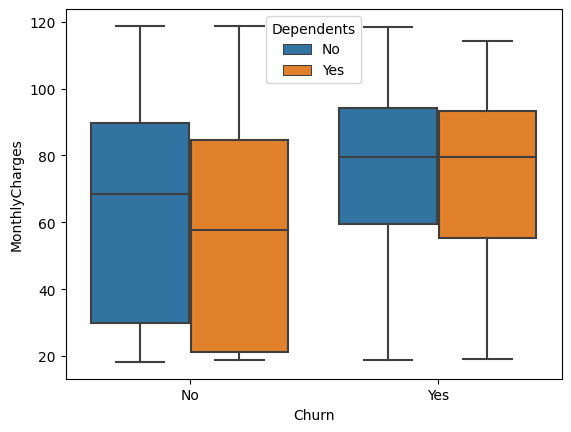

In [18]:
# Monthlcharges VS Churn by Dependents

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue = 'Dependents');

In [19]:
# Resumé statistique

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Nous remarquons que les trois variables(**tenure, MonthlyCharges** et **TotalCharges**) ont des differentes echelles. **tenure** varie entre 0 et 72 tandisque **MonthlyCharges** varie entre 18.25 et 118.75; **TotalCharges** varie entre 18.8 et  8684.8 . De nombreux modeles de Machine Learning fonctionnent mieux avec les variables standardisées ou normalisées.

Nous traiterons la standardisation des donnees dans la section de prétraitement des données.

# Prétraitement des données

In [20]:
# Gestion des valeurs manquantes

data = df.copy()

data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
(11/7043)* 100  # On peut supprimer ces valeurs manquantes

0.1561834445548772

In [22]:
# Suppression des valeurs manquantes

data.dropna(inplace=True)


data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

On constate qu'il n'y a plus de valeurs manquantes.

La deuxieme chose que nous allons faire pour preparer les donnees pour la modelisation est l'encodage des variables categorielles.

In [23]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
# Encodeage des variables binaires

data['gender'] = data['gender'].apply(lambda row: 1 if row =='female' else 0)

binary_columns = data.drop('gender', axis=1).nunique()[data.drop('gender', axis=1).nunique() < 3].keys().to_list()

binary_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [25]:
for column in binary_columns:
  data[column] = data[column].apply(lambda row: 1 if row =='Yes' else 0)

In [26]:
# Encodage des variables categorielles restantes

remaining_cat_vars = data[categorical_columns].nunique()[data[categorical_columns].nunique() > 2].keys().to_list()

remaining_cat_vars_dummies = pd.get_dummies(data = data[remaining_cat_vars], columns=remaining_cat_vars, drop_first=True)

In [27]:
# Nouvelle dataframe

data = pd.concat([data['gender'], data[binary_columns], remaining_cat_vars_dummies, data[numerical_columns]], axis=1)

In [28]:
# Affichage de la nouvelle dataframe

data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,29.85,29.85
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,34,56.95,1889.50
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,2,53.85,108.15
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,2,70.70,151.65


In [29]:
data.shape

(7032, 31)

Nous avons vu que la variable TotalCharges est tres asymetrique, on va la transformer par une fonction racine carré

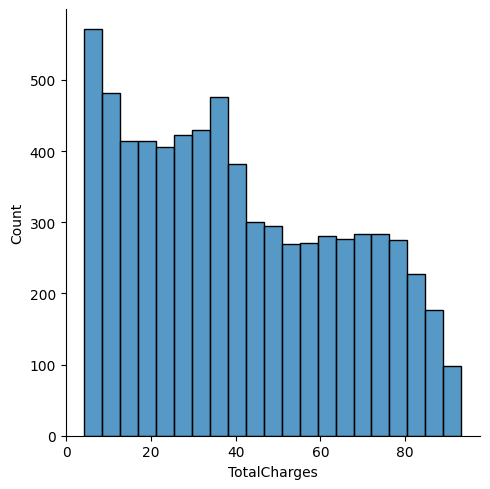

In [30]:
# Transformation de la variable 'TotalCharges'
data['TotalCharges'] = np.sqrt(data['TotalCharges'])

# Histogramme de la variable transformée

sns.displot(data['TotalCharges'], kde=False);

In [31]:
# Coefficient d'asymetrie de la variable 'TotalCharges' apres transformation

data['TotalCharges'].skew()

0.3089261418986736

In [32]:
# Données d'entrainement (20%), de validation (20%) et de test (20%)

X = data.drop('Churn', axis = 1)

y = data['Churn']

seed = 1111

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.4, random_state = seed, stratify = y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,  test_size = 0.4, random_state = seed, stratify = y_test)

Il faut s'assurer que les proportions de personnes ayant resilié ou non leur contrat soient les memes dans les differents ensembles de données.

In [33]:
# Fréquence des classes dans y

pd.DataFrame(y).value_counts(normalize = True)


Churn
0        0.734215
1        0.265785
dtype: float64

In [34]:
# Fréquence des classes dans y_train

pd.DataFrame(y_train).value_counts(normalize = True)


Churn
0        0.734297
1        0.265703
dtype: float64

In [35]:
# Fréquence des classes dans y_val

pd.DataFrame(y_val).value_counts(normalize = True)


Churn
0        0.733847
1        0.266153
dtype: float64

In [36]:
# Fréquence des classes dans y_test

pd.DataFrame(y_test).value_counts(normalize = True)


Churn
0        0.734458
1        0.265542
dtype: float64

Attaquons-nous maintenant au problème de déséquilibre de classe dans les données


Lorsqu'il y a une très grande différence entre le mnombre d'observations dans chaque catégorie de la variable cible à predire, cela peut entraîner des erreurs de modélisation.

Dans notre cas ici, il y a un peu plus de  73% de personnes qui n'ont pas résilié leur abonnement contre un peu plus de 26% qui ont résilié leur abonnement. Il y a donc un grand déséquilibre de classe. Nous pouvons utiliser le reechantillonnage pour creer plus d'équilibre entre les catégories de la variable cible.Soit on crée plus d'observations dans la classe minoritaire (modalité 1) c'est-à-dire on fait un sur-échantillonnage, soit on diminue les observations de la classe majoritaire (modalité 0) c'est-à-dire un sous-echantillonnage.

In [37]:
# Résolution du problème de déséquilibre de classe : Methode de sur-échantillonnage de la classe minoritaire

X2 = X_train

X2['Churn'] = y_train.values

minority = X2[X2.Churn == 1]

majority = X2[X2.Churn == 0]

minority_upsampled = resample(minority, replace = True, n_samples = len(majority), random_state = seed)

upsampled = pd.concat([majority, minority_upsampled])

upsampled

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
6406,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,39,50.65,43.650888,0
6124,0,0,1,1,1,1,0,0,0,0,...,0,1,0,0,0,1,57,59.30,57.221936,0
4051,0,0,1,0,1,1,0,1,1,0,...,1,0,1,1,0,0,72,97.70,82.883653,0
3839,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,1,15,20.05,16.861198,0
2523,0,0,1,1,1,0,0,0,0,1,...,0,0,1,1,0,0,47,20.25,29.553342,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,0,0,0,1,1,1,0,0,1,0,...,0,0,0,0,1,0,1,69.65,8.345658,1
6040,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,1,70.75,8.411302,1
4212,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,90.60,9.518403,1
508,0,0,1,1,1,1,0,1,1,0,...,0,0,0,0,1,0,6,80.50,22.424317,1


In [38]:
# Verification
upsampled['Churn'].value_counts(normalize = True)


0    0.5
1    0.5
Name: Churn, dtype: float64

In [39]:
# Données d'entraînement sur la base la methode de sur-échantillonnage de la classe minoritaire

X_train_up = upsampled.drop('Churn', axis =1)

y_train_up = upsampled['Churn']


In [40]:
# Résolution du problème de déséquilibre de classe : Methode de sous-échantillonnage de la classe majoritaire

majority_downsampled = resample(majority, replace=False, n_samples = len(minority), random_state = seed)

downsampled = pd.concat([minority, majority_downsampled])

downsampled


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
6908,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,9,55.35,21.207310,1
1530,0,0,1,1,1,0,0,0,1,0,...,1,0,0,1,0,0,2,90.00,13.785862,1
3617,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,1,0,18,48.35,28.472794,1
6800,0,0,1,0,1,0,0,0,1,0,...,1,1,0,0,0,1,14,105.95,36.727374,1
3772,0,0,1,0,1,1,0,0,1,0,...,1,0,0,0,1,0,1,95.00,9.746794,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0,0,1,0,1,0,0,1,1,0,...,1,0,1,0,1,0,71,109.25,87.793508,0
3663,0,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,9,88.40,28.082023,0
5033,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,1,1,19.40,4.404543,0
2183,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,2,50.20,10.452272,0


In [41]:
# Vérification

downsampled['Churn'].value_counts(normalize = True)

1    0.5
0    0.5
Name: Churn, dtype: float64

In [42]:
# Données d'entraînement sur la base la methode de sous-échantillonnage de la classe majoritaire

X_train_down = downsampled.drop('Churn', axis=1)

y_train_down = downsampled['Churn']


In [43]:
# y_train et X_train

y_train = X_train['Churn']

X_train = X_train.drop('Churn', axis = 1)


In [44]:
# Définition des donnees d'entraînement
# Choix possibles : (X_train, y_train), (X_train_up, y_train_up) et (X_train_down, y_train_down)

train_features = X_train_up

train_labels = y_train_up


Passons finalement à la normalisation des données

In [45]:
train_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
6406,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,39,50.65,43.650888
6124,0,0,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,1,57,59.30,57.221936
4051,0,0,1,0,1,1,0,1,1,0,...,0,1,0,1,1,0,0,72,97.70,82.883653
3839,0,0,1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,15,20.05,16.861198
2523,0,0,1,1,1,0,0,0,0,1,...,1,0,0,1,1,0,0,47,20.25,29.553342


In [46]:
# Normalisation des variables indépendantes des differents ensembles de données
  # Vous pouvez choisir de standardiser au lieu de normaliser

scaler = MinMaxScaler()

mod_scaler = scaler.fit(train_features)
train_features = mod_scaler.transform(train_features)
X_val = mod_scaler.transform(X_val)
X_test = mod_scaler.transform(X_test)

# Retransformation en DataFrame

train_features = pd.DataFrame(train_features, columns = X.columns)
X_val = pd.DataFrame(X_val, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)


In [47]:
# Toutes les valeurs sont mainmaintenant entre 0 et 1 .

train_features.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
count,6196.0,6196.0,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,...,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,0.0,0.0,0.438509,0.248870,0.904939,0.650904,0.095061,0.439638,0.530826,0.166720,...,0.166720,0.413331,0.165752,0.168496,0.186572,0.419787,0.205939,0.377363,0.496667,0.379936
std,0.0,0.0,0.496244,0.432393,0.293323,0.476723,0.293323,0.496383,0.499089,0.372756,...,0.372756,0.492471,0.371888,0.374336,0.389599,0.493564,0.404419,0.337783,0.287344,0.273721
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056338,0.269652,0.142192
50%,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281690,0.563682,0.332135
75%,0.0,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.676056,0.724876,0.591234
max,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nous avons terminé  le pretraitement de nos données. Passons à la modélisation

Nous choisissons le modèle F1score pour evaluer la performance de chaque modele
qui sera construit.

In [48]:
# Selection des meilleures variables predictives

rf = RandomForestClassifier()

rf.fit(train_features, train_labels)

print(classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1238
           1       0.56      0.51      0.54       449

    accuracy                           0.76      1687
   macro avg       0.70      0.68      0.69      1687
weighted avg       0.76      0.76      0.76      1687



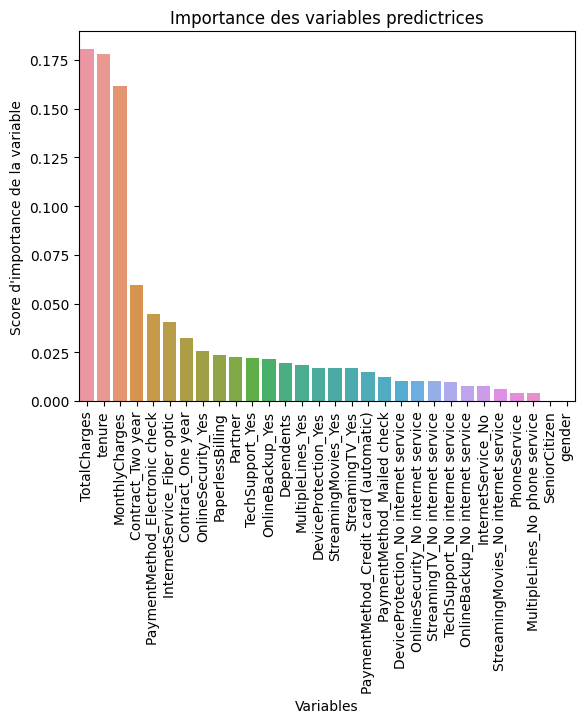

In [49]:
# Importance des variables independantes

vars_imp = pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending=False)

sns.barplot(x = vars_imp.index, y = vars_imp)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Score d'importance de la variable")
plt.title("Importance des variables predictrices")
plt.show()

In [50]:
# Affichage de vars_imp

vars_imp

TotalCharges                             0.180625
tenure                                   0.177822
MonthlyCharges                           0.161837
Contract_Two year                        0.059499
PaymentMethod_Electronic check           0.044805
InternetService_Fiber optic              0.040747
Contract_One year                        0.032282
OnlineSecurity_Yes                       0.025770
PaperlessBilling                         0.023733
Partner                                  0.022325
TechSupport_Yes                          0.022303
OnlineBackup_Yes                         0.021328
Dependents                               0.019410
MultipleLines_Yes                        0.018508
DeviceProtection_Yes                     0.016981
StreamingMovies_Yes                      0.016957
StreamingTV_Yes                          0.016796
PaymentMethod_Credit card (automatic)    0.014885
PaymentMethod_Mailed check               0.012457
DeviceProtection_No internet service     0.010493


In [51]:
# Variables sélectionnées pour les algorithmes

seuil = 0.004

vars_selected = vars_imp[vars_imp > seuil].index.to_list()

train_features = train_features[vars_selected]

X_val = X_val[vars_selected]

X_test = X_test[vars_selected]

In [52]:
# Nombre de variables predictrices

len(train_features.columns)


28

Notre objectif est de construire un modele de classification qui predit si un client se desabonnera ou non. Nous utiliserons différents algrotihme(Logistic Regression, Random Forest, Gradient Boosting, Classificateur Perceptron Multicouche et Support Vector Machine) afin de comparer leurs performances et de choisir le meilleur modèle.

# Modèle de Régression logistique

In [53]:
# Dictionnaire des hyperparametres

param_grid = {'C':[0.001, 0.01, 1, 10, 50, 100, 500]}

# Object GridSearchCV

grid_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state=seed, max_iter=500),
                                 param_grid = param_grid,
                                 scoring='f1', cv=5)

# Entraînement de l'algorithme

logreg_model = grid_logreg_class.fit(train_features, train_labels)

# Meilleur scor et meilleur hyperparametre

print(round(logreg_model.best_score_, 3))

print(logreg_model.best_estimator_)

0.79
LogisticRegression(C=10, max_iter=500, random_state=1111)


Le modèle a un bon score d'entraînement. Evaluons sa performance sur les données de validation afin d'apprecier sa capacité à généraliser sur de nouvelles données.

In [54]:
# Fonction d'évaluation de la performance d'un modèle

def model_evaluation(model, features, labels):
  pred = model.predict(features)
  print(classification_report(labels, pred))

In [55]:
# Evaluation du modèle de régression logistique

model_evaluation(logreg_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1238
           1       0.52      0.74      0.61       449

    accuracy                           0.75      1687
   macro avg       0.70      0.75      0.71      1687
weighted avg       0.79      0.75      0.76      1687



Appliquons l'algorithme Recursive Feature Eliminator(RFE) sur le modèle afin de voir s'il garde les mêmes performances lorsqu'on reduit le nombre de predicteurs(qui était 28). En effet, plus le modèle est complexe, plus il est difficile de l'interpreter.

In [56]:
# Creation d'une fonction de construction d'un modèle avec utilisation de l'algorithme RFE

def model_with_rfe(model):
  rfe_model = RFE(estimator=model, verbose=0)
  rfe_model.fit(train_features, train_labels)
  mask = rfe_model.support_
  reduce_X = train_features.loc[:, mask]
  print(reduce_X.columns)
  return rfe_model


In [57]:
# Logistic Regression RFE

rfe_logreg_model = model_with_rfe(logreg_model.best_estimator_)

rfe_logreg_model

Index(['TotalCharges', 'MonthlyCharges', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'Contract_One year', 'PaperlessBilling', 'MultipleLines_Yes',
       'StreamingMovies_Yes', 'StreamingTV_Yes',
       'DeviceProtection_No internet service',
       'OnlineSecurity_No internet service', 'InternetService_No',
       'StreamingMovies_No internet service'],
      dtype='object')


RFE(estimator=LogisticRegression(C=10, max_iter=500, random_state=1111))

In [58]:
# Evaluation du modèle de regression avec RFE

model_evaluation(rfe_logreg_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1238
           1       0.51      0.73      0.60       449

    accuracy                           0.74      1687
   macro avg       0.70      0.74      0.71      1687
weighted avg       0.79      0.74      0.75      1687



La RFE a réduit le nombre de predicteurs de 28 a
14 et n'a pas ameliore
la performance du modèle.

Passons à l'algorithme de forêt aléatoire


# Modèle de Foret aléatoire


In [61]:
# Dictionnaire des hyperparametres

param_grid_rf = {'n_estimators':[10, 50, 100, 500, 1000],
                 'max_depth':[3, 5, 10, 20, None]}

# Object GridSearchCV

grid_rf_class = GridSearchCV(estimator=RandomForestClassifier(random_state=seed),
                             param_grid = param_grid_rf,
                             scoring='f1', cv=5)

# Entraînement de l'algorithme

rf_model = grid_rf_class.fit(train_features, train_labels)

# Meilleur score et meilleur hyperparametre

print(round(rf_model.best_score_, 3))

print(rf_model.best_estimator_)

0.907
RandomForestClassifier(random_state=1111)


In [62]:
# Evaluation du modèle de foret aléatoire

model_evaluation(rf_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1238
           1       0.58      0.52      0.55       449

    accuracy                           0.77      1687
   macro avg       0.70      0.69      0.70      1687
weighted avg       0.76      0.77      0.77      1687



In [64]:
# Random Forest avec RFE

rfe_forest_model = model_with_rfe(rf_model.best_estimator_)

rfe_forest_model

Index(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'Contract_One year', 'OnlineSecurity_Yes', 'PaperlessBilling',
       'Partner', 'TechSupport_Yes', 'OnlineBackup_Yes', 'Dependents',
       'OnlineSecurity_No internet service'],
      dtype='object')


RFE(estimator=RandomForestClassifier(random_state=1111))

In [66]:
# Evaluation du modèle de forêt aléatoire avec RFE

model_evaluation(rfe_forest_model, X_val, y_val)


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1238
           1       0.57      0.53      0.55       449

    accuracy                           0.77      1687
   macro avg       0.70      0.69      0.70      1687
weighted avg       0.76      0.77      0.77      1687



Comparativement aux valeurs du modèle de regression logistique, le modèle de forêt aléatoire semble moins efficace.

Appliquons une RFE

Au vu de ces valeurs, nous retiendrons le modèle de forêt aléatoire obtenu sans RFE.

Passons à la construction d'un modèle de réseau de neurones artificielles.

# Classification Perceptron multicouche

In [69]:
# MLPClassifier

mlp = MLPClassifier(random_state=seed, max_iter=1000)

parameters = {'hidden_layer_sizes':[(50,), (100,), (200,)],
              #'activation':['identity', 'logistic', 'tanh', 'relu'],
              'learning_rate':['constant', 'invscalling', 'adaptive']}

mlp_cv = GridSearchCV(mlp, parameters, scoring='f1', cv=5, n_jobs=-1)

mlp_cv.fit(train_features, train_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-p

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=1111),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'learning_rate': ['constant', 'invscalling',
                                           'adaptive']},
             scoring='f1')

In [70]:
# Meilleur score et meilleur hyperparametre

round(mlp_cv.best_score_, 3)

0.853

In [71]:
mlp_cv.best_estimator_

MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=1111)

In [73]:
# Evaluation du modèle Perceptron

model_evaluation(mlp_cv.best_estimator_, X_val, y_val)


              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1238
           1       0.54      0.59      0.57       449

    accuracy                           0.76      1687
   macro avg       0.69      0.71      0.70      1687
weighted avg       0.77      0.76      0.76      1687



Passons maintenant à un modèle SVM

# Support Vector Machine

In [74]:
# Support Vector Machine : Classificateur qui trouve l'hyperplan optimal qui maximise la frontière entre 2 classes

svm_model = SVC(random_state=seed)

svm_hyp = {'kernel':['linear', 'rbf'], 'C':[0.1, 1.0, 10, 50, 100]}

svm_cv = GridSearchCV(svm_model, svm_hyp, scoring='f1', cv=5)

svm_cv.fit(train_features, train_labels)

print(round(svm_cv.best_score_, 3))

print(svm_cv.best_estimator_)

0.847
SVC(C=100, random_state=1111)


In [75]:
# Evaluation du modèle SVM

model_evaluation(svm_cv.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1238
           1       0.48      0.58      0.52       449

    accuracy                           0.72      1687
   macro avg       0.66      0.68      0.66      1687
weighted avg       0.74      0.72      0.73      1687



# Conclusion

Nous avons utilisé les données d'évaluation pour sélectionner le meilleur modèle. Ensuite nous évaluons le meilleur modèle sélectionné sur les données de test afin d'apprecier sa performance sur de nouvelles données . Idéalement les perfoperformances de ce modèle sur les données d'evaluation et sur les données de test doivent être relativement proches.

In [78]:
model_evaluation(logreg_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1238
           1       0.52      0.74      0.61       449

    accuracy                           0.75      1687
   macro avg       0.70      0.75      0.71      1687
weighted avg       0.79      0.75      0.76      1687



In [77]:
# Performance du meilleur modèle sur les données de test

model_evaluation(logreg_model.best_estimator_, X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       827
           1       0.54      0.77      0.64       299

    accuracy                           0.77      1126
   macro avg       0.72      0.77      0.73      1126
weighted avg       0.81      0.77      0.78      1126

